In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
from pyod.models.iforest import IForest
from pyod.models.loda import LODA
from pyod.models.dif import DIF

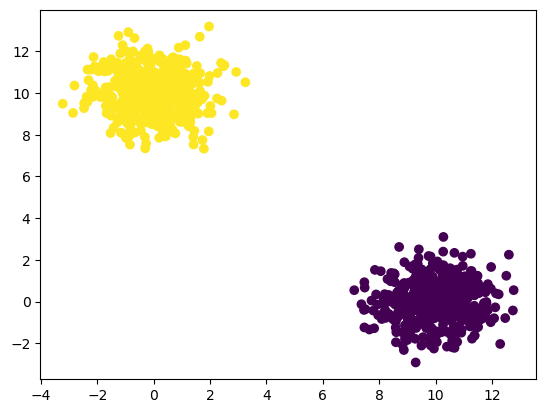

In [28]:
X, y = make_blobs(n_samples=1000, n_features=2, centers=[(10, 0), (0, 10)], cluster_std=1)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [29]:
def test_model(model_type, model_args, test_data):
    model = model_type(**model_args)
    model.fit(X, y)
    
    anomaly_score = model.decision_function(test_data)

    plt.title(model_type.__name__)
    plt.scatter(test_data[:, 0], test_data[:, 1], c=anomaly_score)
    plt.colorbar()
    plt.show()

/home/robert/anaconda3/envs/aienv/lib/python3.11/site-packages/pyod/models/base.py:423: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


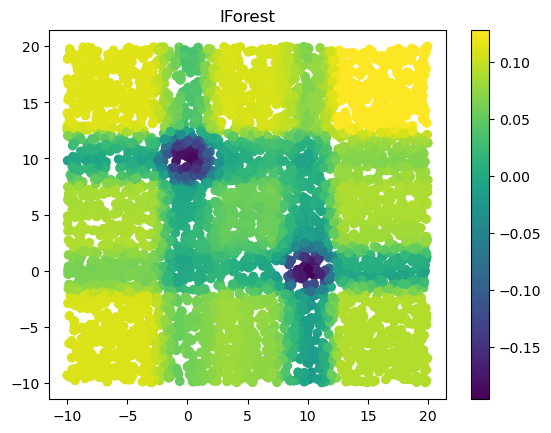

/home/robert/anaconda3/envs/aienv/lib/python3.11/site-packages/pyod/models/base.py:423: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


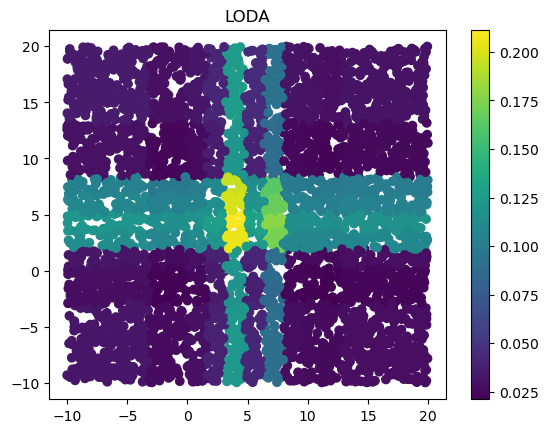

/home/robert/anaconda3/envs/aienv/lib/python3.11/site-packages/pyod/models/base.py:423: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


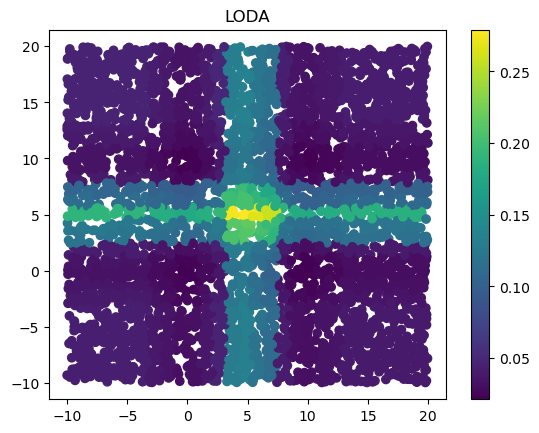

/home/robert/anaconda3/envs/aienv/lib/python3.11/site-packages/pyod/models/base.py:423: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


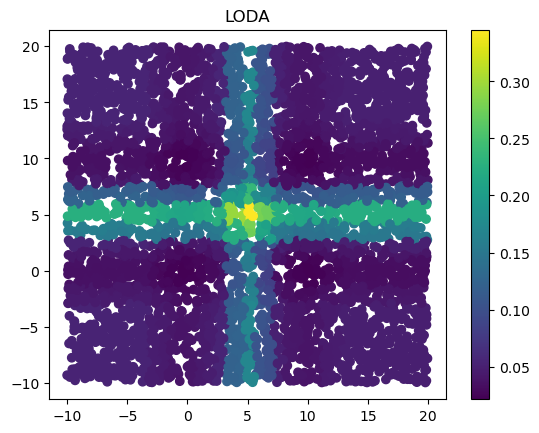

/home/robert/anaconda3/envs/aienv/lib/python3.11/site-packages/pyod/models/base.py:423: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


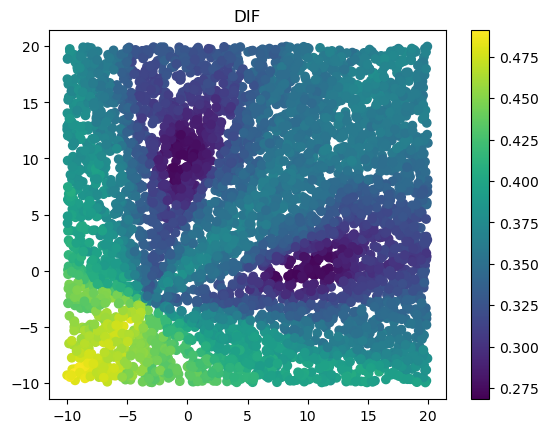

/home/robert/anaconda3/envs/aienv/lib/python3.11/site-packages/pyod/models/base.py:423: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


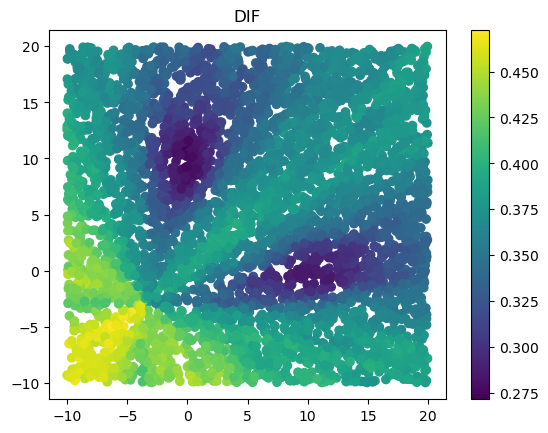

In [30]:
test_data = np.random.uniform(-10, 20, (5000, 2))

test_model(IForest, {'contamination': 0.02}, test_data)
test_model(LODA, {'contamination': 0.02, 'n_bins': 10}, test_data)
test_model(LODA, {'contamination': 0.02, 'n_bins': 15}, test_data)
test_model(LODA, {'contamination': 0.02, 'n_bins': 20}, test_data)
test_model(DIF, {'contamination': 0.02, 'hidden_neurons': [1024, 1024, 1024]}, test_data)
test_model(DIF, {'contamination': 0.02, 'hidden_neurons': [128, 128, 64, 64]}, test_data)

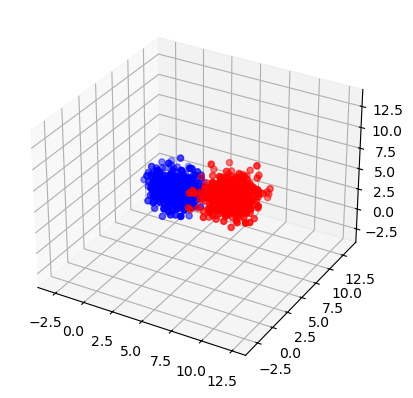

In [40]:
X, y = make_blobs(n_samples=1000, n_features=3, centers=[(0, 10, 0), (10, 0, 10)], cluster_std=1)

# plot 3D data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[y == 0, 0], X[y == 0, 1], X[y == 0, 2], c='blue')
ax.scatter(X[y == 1, 0], X[y == 1, 1], X[y == 1, 2], c='red')
plt.show()


In [44]:
def test_model_3d(model_type, model_args, test_data):
    model = model_type(**model_args)
    model.fit(X, y)
    
    anomaly_score = model.decision_function(test_data)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(test_data[:, 0], test_data[:, 1], test_data[:, 2], c=anomaly_score)
    plt.show()

In [45]:
test_data_3d = np.random.uniform(-10, 20, (5000, 3))

/home/robert/anaconda3/envs/aienv/lib/python3.11/site-packages/pyod/models/base.py:423: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


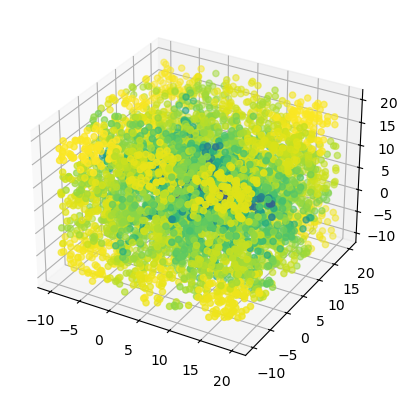

/home/robert/anaconda3/envs/aienv/lib/python3.11/site-packages/pyod/models/base.py:423: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


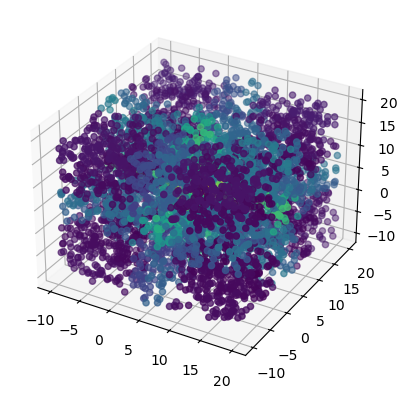

/home/robert/anaconda3/envs/aienv/lib/python3.11/site-packages/pyod/models/base.py:423: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


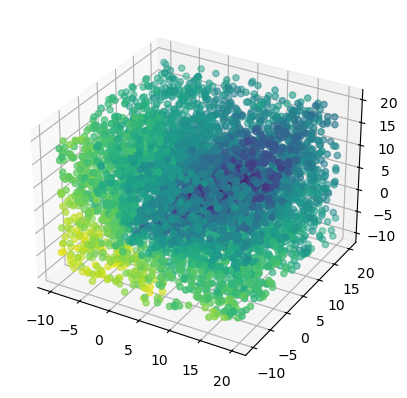

In [46]:
test_model_3d(IForest, {'contamination': 0.02}, test_data_3d)
test_model_3d(LODA, {'contamination': 0.02, 'n_bins': 10}, test_data_3d)
test_model_3d(DIF, {'contamination': 0.02, 'hidden_neurons': [128, 128, 64, 64]}, test_data_3d)